<a href="https://colab.research.google.com/github/catpixie-47/FDIP/blob/main/FDIP_3_123B1F047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files

uploaded = files.upload()


Saving testimage.png to testimage (2).png


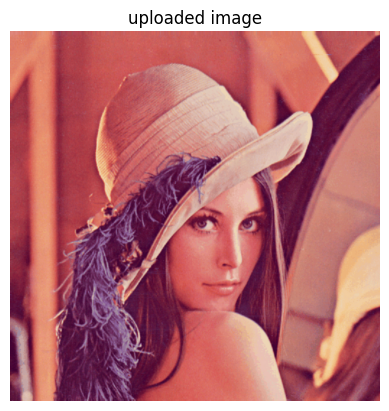

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('testimage.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #convert bgr to rgb

plt.imshow(img)
plt.axis('off')
plt.title("uploaded image")
plt.show()


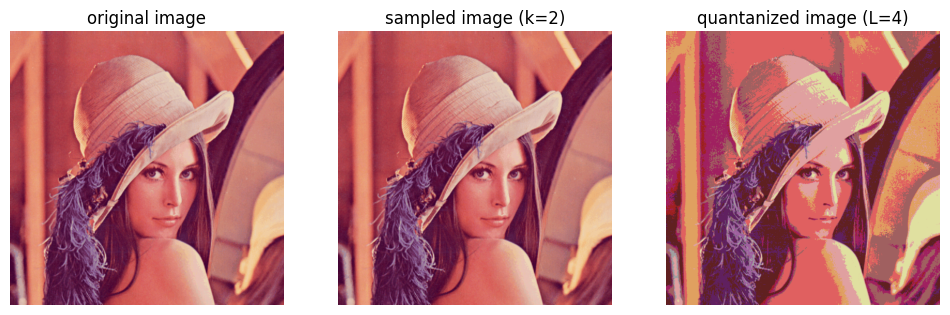

number of unique colors after quantanization: 17


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_sampling(img, k):
    return img[::k , ::k]


def image_quantization(img, L):
    delta = 256 // L
    quantized_img = (img // delta) * delta + (delta // 2)
    return quantized_img.astype(np.uint8)

sampling_factor = 2
quant_levels = 4


sampled_img = image_sampling(img, sampling_factor)
quantized_img = image_quantization(img, quant_levels)


plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("original image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,3,2)
plt.title(f"sampled image (k={sampling_factor})")
plt.imshow(sampled_img)
plt.axis('off')

plt.subplot(1,3,3)
plt.title(f"quantanized image (L={quant_levels})")
plt.imshow(quantized_img)
plt.axis('off')

plt.show()

#unique colors
unique_colors = np.unique(quantized_img.reshape(-1, 3), axis=0)
print("number of unique colors after quantanization:", len(unique_colors))